<a href="https://colab.research.google.com/github/Harsha-chikkala/Data-Visualization-Using-Titanic-Dataset/blob/main/Data_Visualization_Using_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("titanic_dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    Male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    Male  35.0      0      0   8.0500   

   Embarked  
0         3  
1         1  
2         3  
3         3  
4         3  


In [5]:
df.shape

(889, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


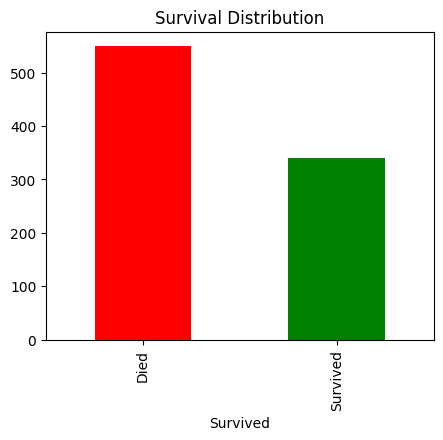

In [9]:
# 1. Survival Rate Overview
plt.figure(figsize=(5, 4))
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Died', 'Survived'])
plt.title('Survival Distribution')
plt.show()

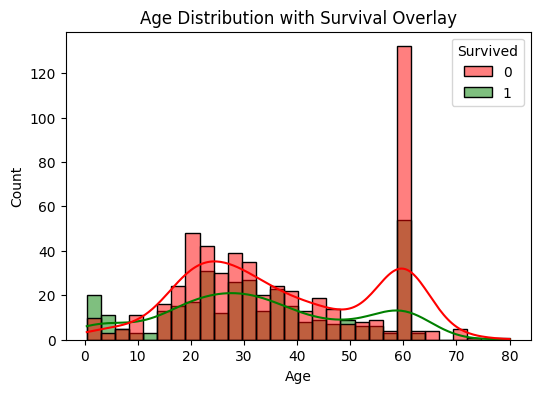

In [10]:
# 2. Age Distribution Analysis
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Age Distribution with Survival Overlay')
plt.show()

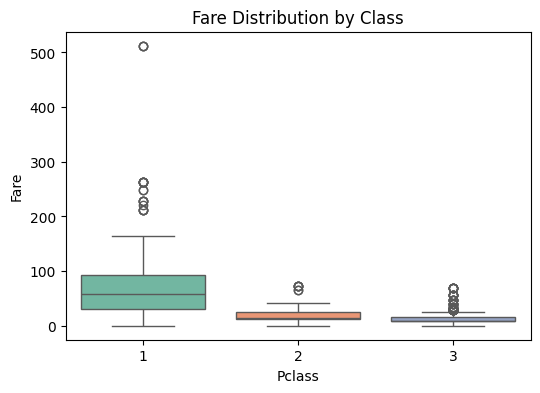

In [11]:
# 3. Fare Distribution by Class
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Fare Distribution by Class')
plt.show()

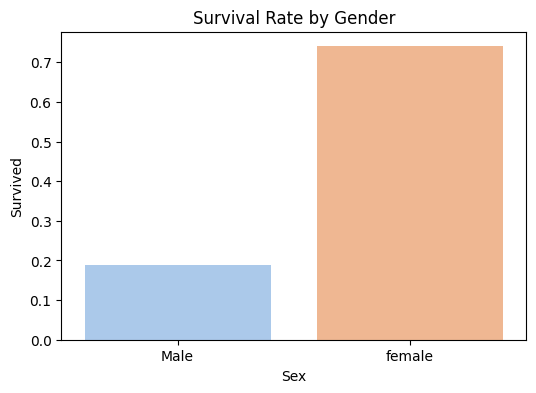

In [12]:
# 4. Survival by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, estimator=lambda x: sum(x) / len(x), ci=None, palette='pastel')
plt.title('Survival Rate by Gender')
plt.show()


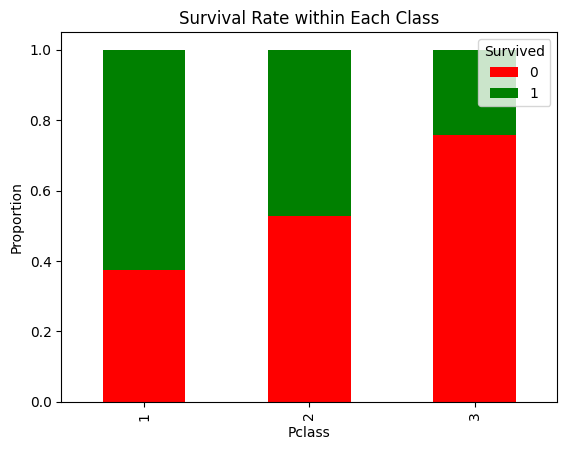

In [13]:
# 5. Class vs Survival Analysis
class_survival = df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)
class_survival.div(class_survival.sum(axis=1), axis=0).plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Rate within Each Class')
plt.ylabel('Proportion')
plt.show()

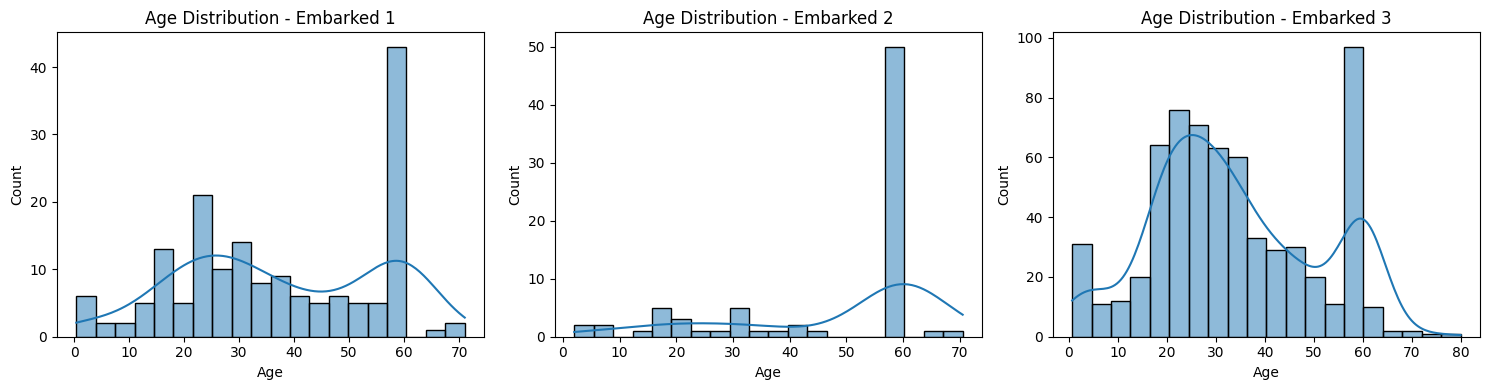

In [14]:
# 6. Embarkation Port Analysis
embarked = df[df['Embarked'].notna()]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, port in enumerate(sorted(embarked['Embarked'].unique())):
    sns.histplot(data=embarked[embarked['Embarked'] == port], x='Age', bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'Age Distribution - Embarked {port}')
plt.tight_layout()
plt.show()

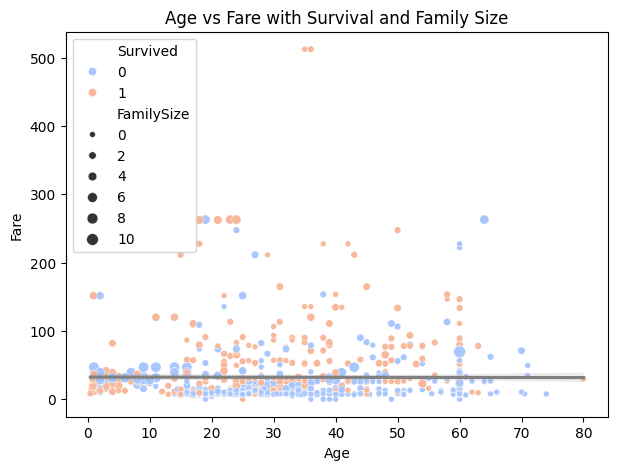

In [15]:
# 7. Age vs Fare Scatter Plot
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='FamilySize', palette='coolwarm')
sns.regplot(data=df, x='Age', y='Fare', scatter=False, color='gray')
plt.title('Age vs Fare with Survival and Family Size')
plt.show()

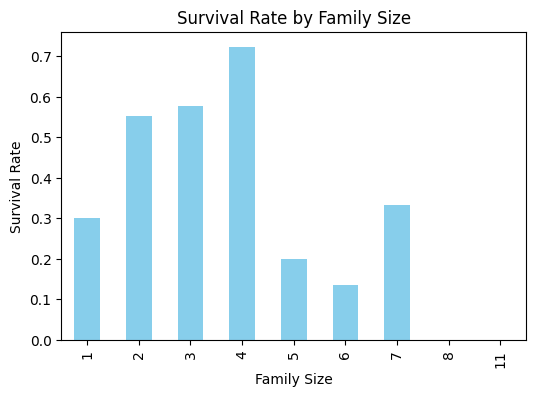

In [16]:
# 8. Family Size Impact
df['FamilySizeTotal'] = df['SibSp'] + df['Parch'] + 1
family_survival = df.groupby('FamilySizeTotal')['Survived'].mean()
plt.figure(figsize=(6, 4))
family_survival.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

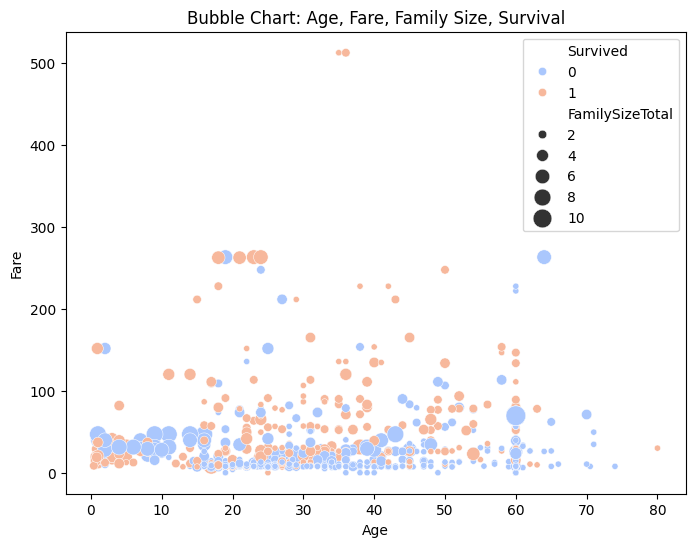

In [17]:
# 9. Multi-dimensional Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='FamilySizeTotal', sizes=(20, 200), palette='coolwarm')
plt.title('Bubble Chart: Age, Fare, Family Size, Survival')
plt.show()

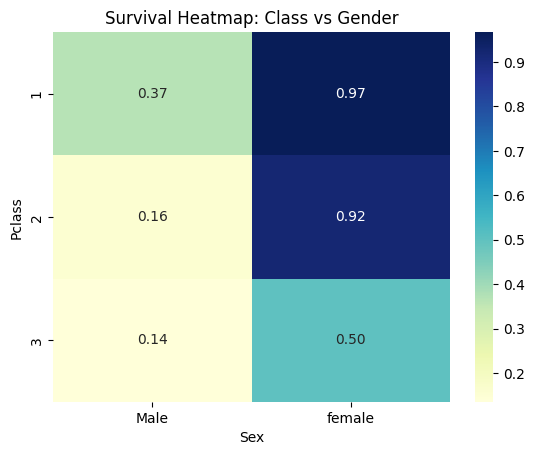

In [18]:
# 10. Survival Heatmap
heatmap_data = df.pivot_table(index='Pclass', columns='Sex', values='Survived')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Heatmap: Class vs Gender')
plt.show()

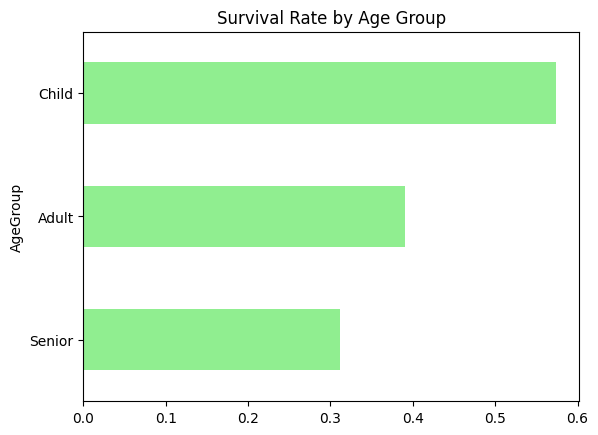

In [19]:
# 11. Age Group Analysis
bins = [0, 12, 50, 100]
labels = ['Child', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_survival = df.groupby('AgeGroup')['Survived'].mean().sort_values()
age_group_survival.plot(kind='barh', color='lightgreen')
plt.title('Survival Rate by Age Group')
plt.show()


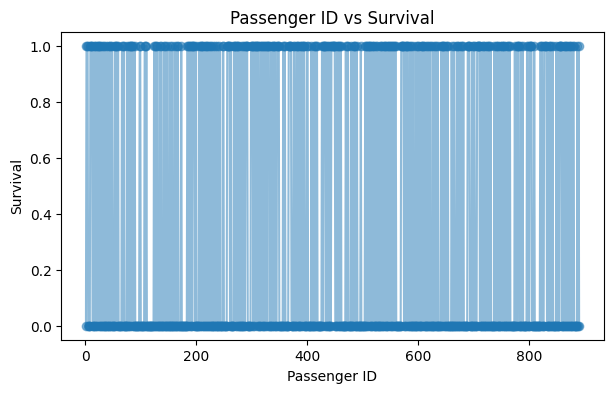

In [20]:
# 12. Passenger ID vs Survival Pattern
plt.figure(figsize=(7, 4))
df_sorted = df.sort_values('PassengerId')
plt.plot(df_sorted['PassengerId'], df_sorted['Survived'], marker='o', linestyle='-', alpha=0.5)
plt.title('Passenger ID vs Survival')
plt.xlabel('Passenger ID')
plt.ylabel('Survival')
plt.show()

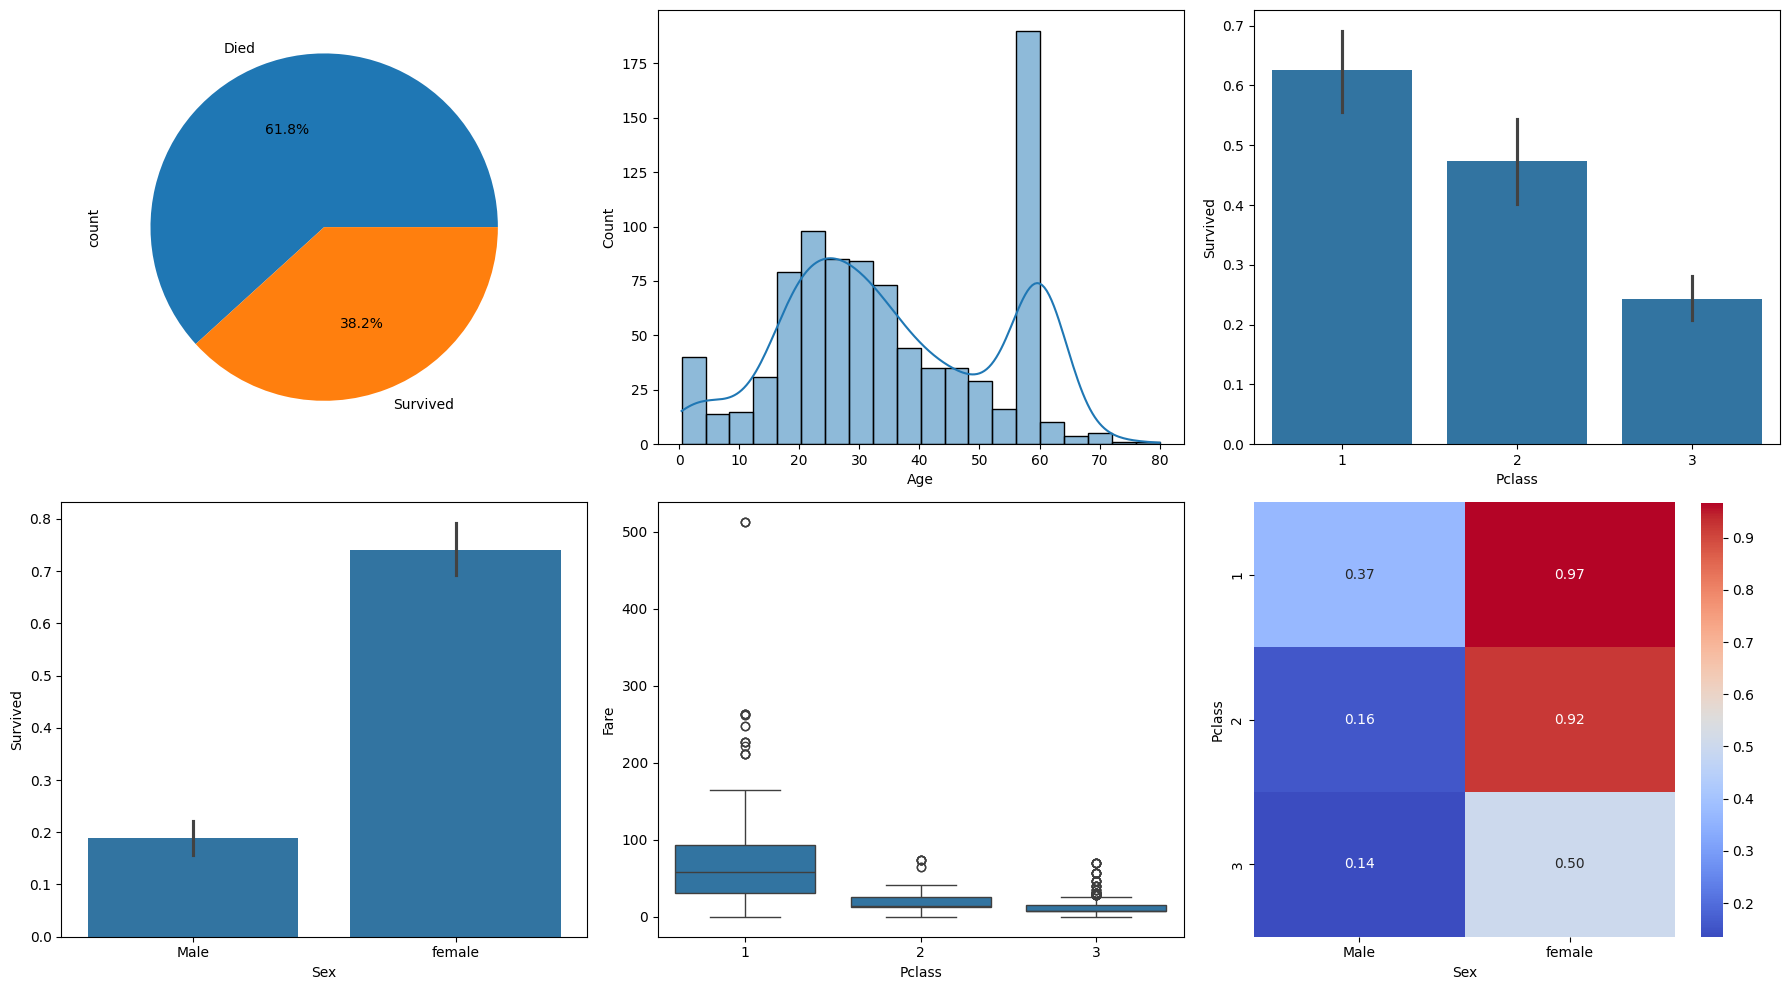

In [21]:
# 13. Comprehensive Dashboard
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
df['Survived'].value_counts().plot.pie(labels=['Died', 'Survived'], autopct='%1.1f%%', ax=axs[0, 0])
sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0, 1])
sns.barplot(x='Pclass', y='Survived', data=df, ax=axs[0, 2])
sns.barplot(x='Sex', y='Survived', data=df, ax=axs[1, 0])
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axs[1, 1])
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1, 2])
plt.tight_layout()
plt.show()

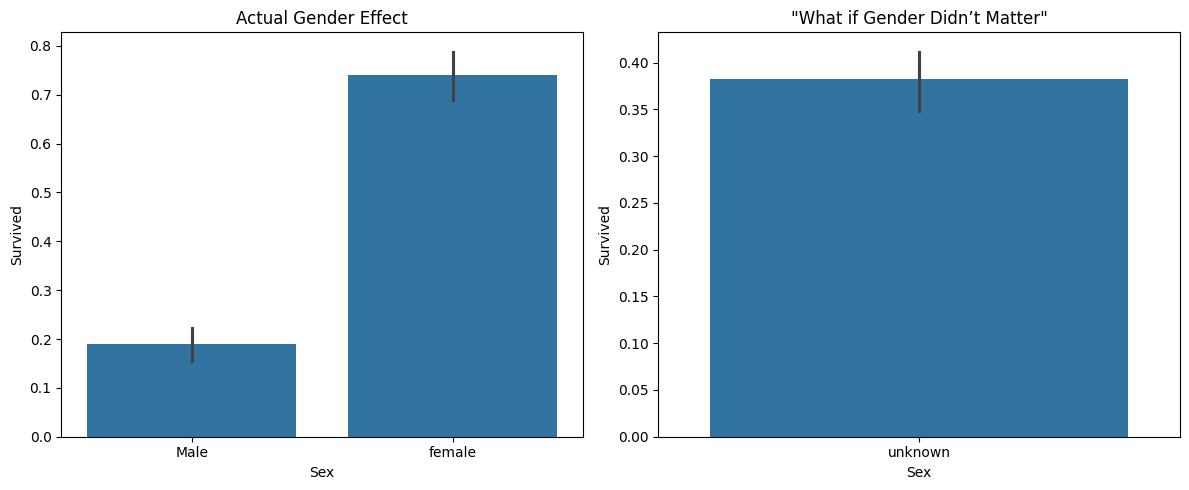

In [22]:
# 14. Interactive-Style Comparison
gender_removed = df.copy()
gender_removed['Sex'] = 'unknown'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Actual Gender Effect')
sns.barplot(x='Sex', y='Survived', data=gender_removed, ax=axes[1])
axes[1].set_title('"What if Gender Didn’t Matter"')
plt.tight_layout()
plt.show()

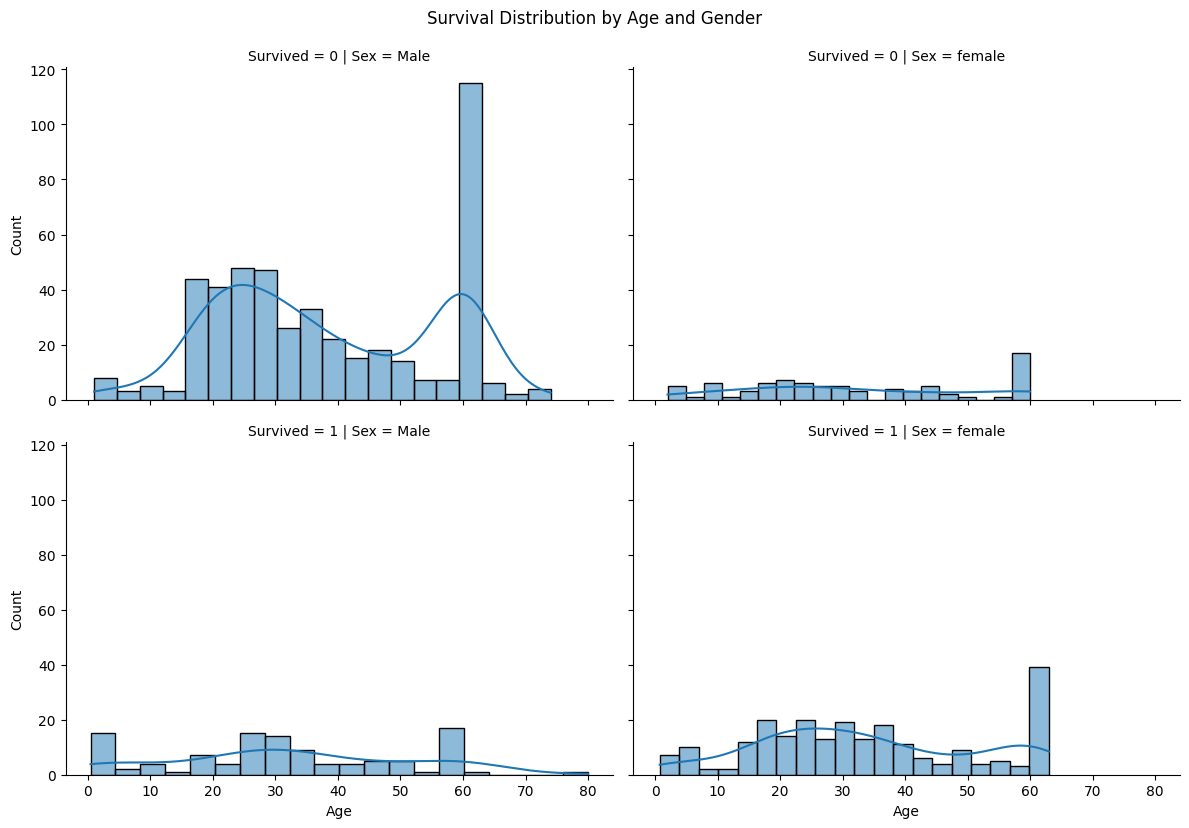

In [23]:
# 15. Survival Rate by Age and Gender
g = sns.FacetGrid(df, col="Sex", row="Survived", height=4, aspect=1.5)
g.map(sns.histplot, "Age", bins=20, kde=True)
plt.suptitle("Survival Distribution by Age and Gender", y=1.03)
plt.show()

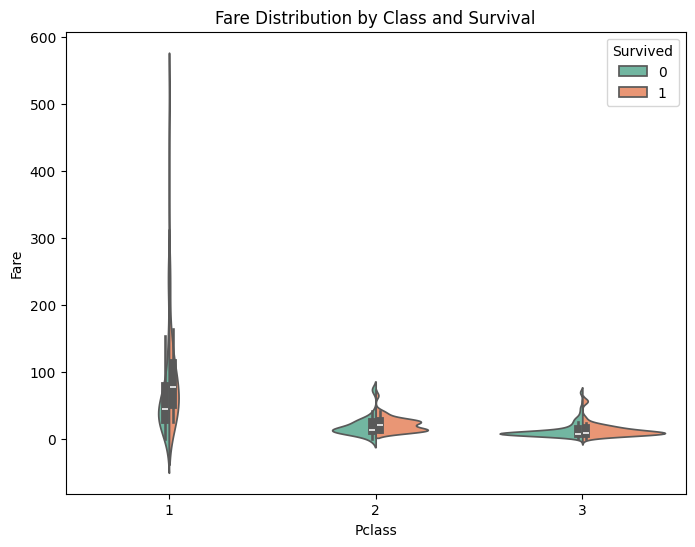

In [24]:
# 16. Fare vs Pclass and Survival
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived', split=True, palette='Set2')
plt.title("Fare Distribution by Class and Survival")
plt.show()

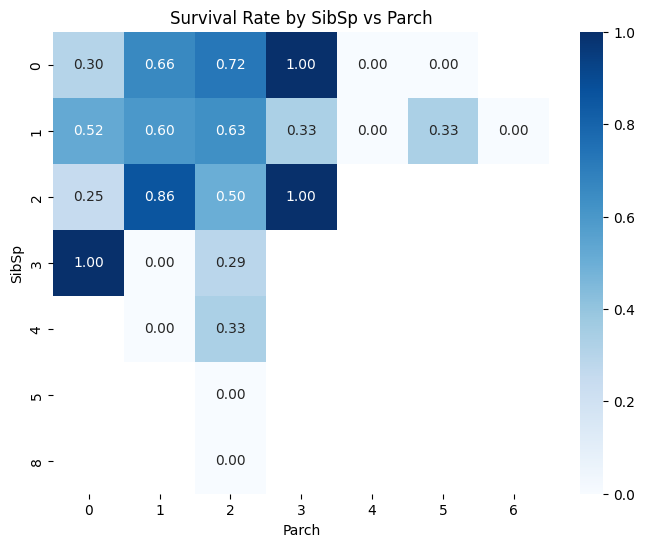

In [25]:

# 17. SibSp vs Parch (Family Relationship)
family_pivot = df.pivot_table(index='SibSp', columns='Parch', values='Survived', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(family_pivot, annot=True, cmap='Blues', fmt=".2f")
plt.title('Survival Rate by SibSp vs Parch')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.show()

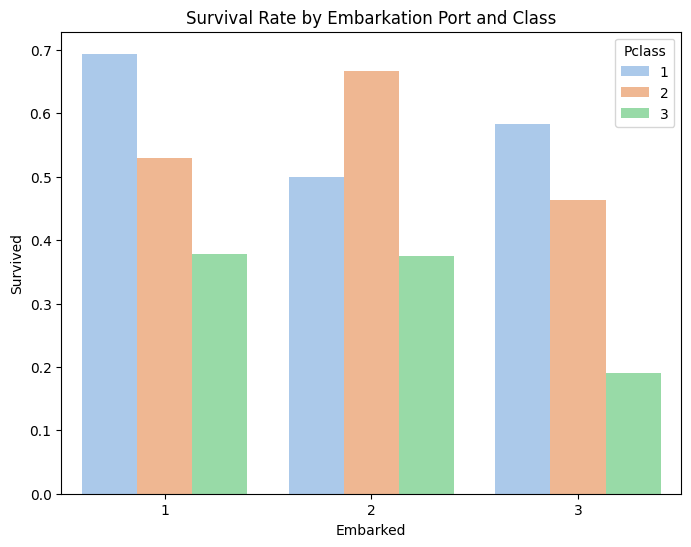

In [26]:
# 18. Embarkation vs Class vs Survival
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Embarked', y='Survived', hue='Pclass', ci=None, palette='pastel')
plt.title('Survival Rate by Embarkation Port and Class')
plt.show()

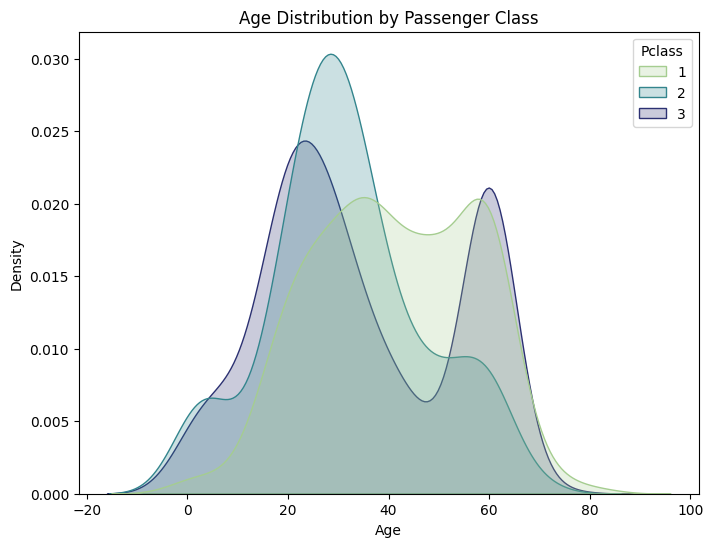

In [27]:
# 19. Age Distribution by Class
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Pclass', fill=True, common_norm=False, palette='crest')
plt.title('Age Distribution by Passenger Class')
plt.show()